# Installing and Importing the CJH scraper from JATA

In [1]:
!pip install JATA
from CJH import CJH_Archives

     |████████████████████████████████| 1.2MB 2.8MB/s 


# What can a computer see when it browses the internet?

In this tutorial we will go over how the AJHS digital archive scraper was built as well as how you can extend it to be used on any archive in the [Center For Jewish History (CJH) ArchiveSpace](https://archives.cjh.org/repositories). Additionally, the module could probably be extended for use on other ArchiveSpaces.

The first question we need to ask ourselves is what the computer can see when it visits a web page. You can get an idea of what is accessible by right clicking anywhere on a page via developer tools using the option to “inspect” or “inspect element”.



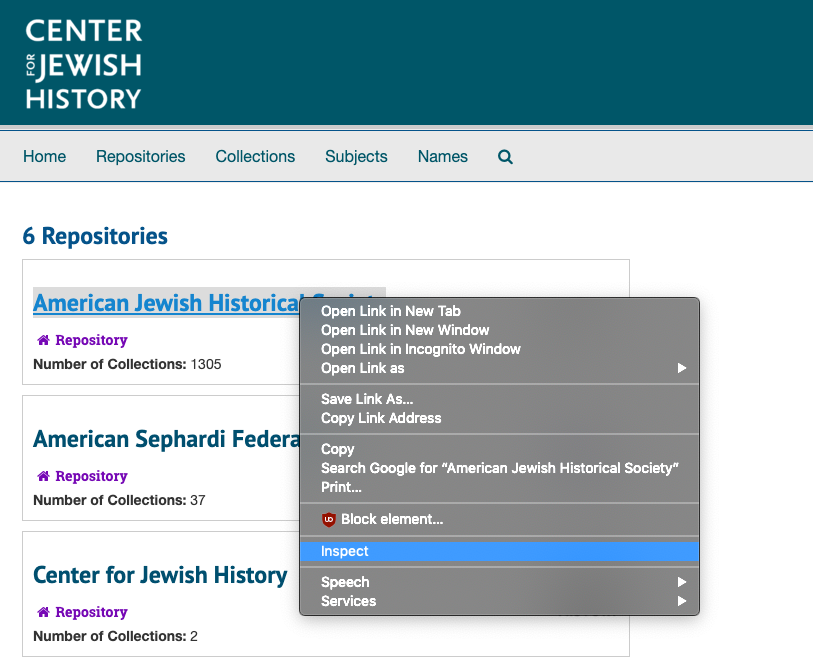

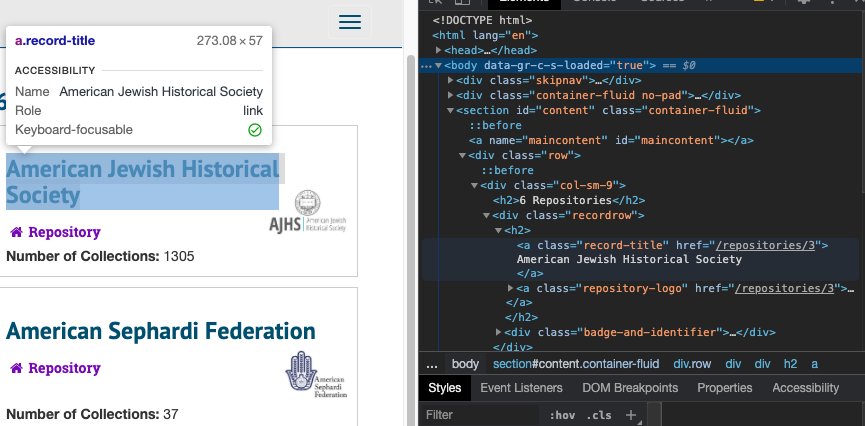


## What It Can't See: HTML rendering vs dynamic loading like Javascript


For the most part, most of the information you can access with your eyes lives somewhere within the HTML of the webpage you are on. However, there are certain types of objects, or sometimes whole pages that are rendered dynamically. These pages can be scraped, however they require a webdriver that simulates something like Chrome or Firefox to access data as it is dynamically rendered.

Luckily, everything we need in the CJH ArchiveSpace is directly in the HTML so we'll go ahead with a strictly requests based scraper.


## Methods and Tools

The entirety of the Jews Across The Americas (JATA) Package is written in python3 and available on PyPi using pip. The CJH module leverages [BeautifulSoup4](https://pypi.org/project/beautifulsoup4/) and [Pandas](https://pypi.org/project/pandas/) to systematically collect and clean our MetaData. Included in the final spreadsheet are links directly to records or collections in case you want to request a physical or digital copy from the organization.


# Scraping Archives or Indexes


If you navigate to the records or collections pages on the AJHS repository, you’ll see that each page only displays around 30 records. (Could be more or less for you depending on screen size but that won't affect the scraper) Because of this, we need to figure out a way to look through multiple pages and extract data from all of the records in the repository.

## Templates Make Things Easy: extracting data


The nice thing about a collection of records or an archive database is each entry is relatively similar in structure. Whether that be fields, location of data within the HTML, or how data is encapsulated across different record types (think finding-aid vs individual document), more often than not, most of the information across the various areas of the site can be obtained using a relatively uniform approach.


# Things to Consider When Constructing a Scraper for AJHS



## Picking the Data to Collect
The data in each repository seems to be organized something like this. Each object has a type, the most notable of the two are Records and Collections. Collections are digitized finding aids, which hold information about groups of records. All records are members of some sort of collections, you can think about these as boxes on the shelf where the physical painting or letter lives in a warehouse. However, the digital medium complicates this, since records may exist in multiple collections at once, which adds an interesting layer of abstraction to the exploration of how records relate to each other.


INSERT: image of records vs collection layouts

## How it works
In english, the way the code works is by looking through either a slice of or all pages for a given object type, collecting the name of the record and a link to the full description page where all the meta data is held, and then visiting each page to capture the information in an ever growing pandas dataframe (conceptually equivalent and exportable to csv/excel/google sheets file). We then clean the data up by removing any excess html or unwanted formatting from the data before returning it as a tidied up dataset. 


## Generalizing the Scraper: dynamically recognizing the variables on each page
The crux of this program was handling indescrepencies between different record types, mainly regarding missingness. All pages shared some subset of a large list of fields, but some entries did not have data for each field, and missing data meant missing labels. To solve this, we created a function that checks to see which of the headers is available on a given entry page, it then constructs a list of things to search for and parses based on those headers. If you were to adapt this to a different ArchiveSpace, the only thing you would have to do is copy the module and replace the header lists.

***Not for extending to other ArchiveSpaces***: Each record has two main containers where the data lives. In html these are called dividers because they divide the page up. Both dividers contain data and other ArchiveSpaces may have more. So be sure to adjust the header lists for each divider in the code and make sure you put all the possible headers into each divider list.


Picture of example of headers with boxes outlining them as well as inspected hover overs

## Decide how much data you want to scrape
The function is built to take a starting page, and a number of pages to stop scraping after. For this example we will do 3 pages, starting on page 1, for the sake of saving time but feel free to scrape the whole database if you feel so inclined!


## Running the Code!

In [2]:
#records
ajhs_recs = CJH_Archives('AJHS').get_meta_data('records', 1, 2)
#collections
ajhs_cols= CJH_Archives('AJHS').get_meta_data('collections', 1, 2)

Creating CJHA Scraper Object for AJHS
Scraping All Individual Records
Scraping Archive Index for Entry Links 1
Scraping Archive Index for Entry Links 2
Number of Objects Extracted:  60
Scraping entry meta data...
Record:  1 https://archives.cjh.org/repositories/3/archival_objects/85903 
      "______ for the absorbing of Ethiopian immigrants ___ ____," by Edna Angel, 1990
    
Record:  2 https://archives.cjh.org/repositories/3/archival_objects/1149685 
      #1-7, 1960
    
Record:  3 https://archives.cjh.org/repositories/3/archival_objects/1149756 
      #1-10, 1968
    
Record:  4 https://archives.cjh.org/repositories/3/archival_objects/1149638 
      #1-14, 1953
    
Record:  5 https://archives.cjh.org/repositories/3/archival_objects/1149701 
      #1-14, 1962
    
Record:  6 https://archives.cjh.org/repositories/3/archival_objects/1149647 
      #1-16, 1954
    
Record:  7 https://archives.cjh.org/repositories/3/archival_objects/1149663 
      #1-18, 1956
    
Record:  8 https://ar

## Output For Records

In [3]:
(ajhs_recs)

,Access Restrictions,Dates,Digital Material,Extent,Language of Materials,Link,Name,Physical Storage Information,Related Names,Repository Details,Scope and Contents
0,The collection is open to all researchers by p...,1990,,From the Collection: 92.2 Linear Feet (168 ...,(in Yiddish),/repositories/3/archival_objects/85360,"\n ""______ for the absorbing of Ethiopian...","Box: 160, Folder: 5 (Mixed Materials) ...",Creator From the Collection: American Associ...,Repository Details Part of the American Jewis...,From the Sub-Series: The series c...
1,,1960,,From the Collection: 1535.8 Linear Feet (15...,"From the Sub-Series: English, Hebrew,...",/repositories/3/archival_objects/1149452,"\n #1-7, 1960\n","Box: 673, Folder: 3 (Mixed Materials) ...",Creator From the Collection: National Jewish...,Repository Details Part of the American Jewis...,From the Sub-Series: The Departme...
2,,1968,,From the Collection: 1535.8 Linear Feet (15...,"From the Sub-Series: English, Hebrew,...",/repositories/3/archival_objects/1149452,"\n #1-10, 1968\n","Box: 676, Folder: 10 (Mixed Materials) ...",Creator From the Collection: National Jewish...,Repository Details Part of the American Jewis...,From the Sub-Series: The Departme...
3,,1953,,From the Collection: 1535.8 Linear Feet (15...,"From the Sub-Series: English, Hebrew,...",/repositories/3/archival_objects/1149452,"\n #1-14, 1953\n","Box: 671, Folder: 14 (Mixed Materials) ...",Creator From the Collection: National Jewish...,Repository Details Part of the American Jewis...,From the Sub-Series: The Departme...
4,,1962,,From the Collection: 1535.8 Linear Feet (15...,"From the Sub-Series: English, Hebrew,...",/repositories/3/archival_objects/1149452,"\n #1-14, 1962\n","Box: 673, Folder: 19 (Mixed Materials) ...",Creator From the Collection: National Jewish...,Repository Details Part of the American Jewis...,From the Sub-Series: The Departme...
5,,1954,,From the Collection: 1535.8 Linear Feet (15...,"From the Sub-Series: English, Hebrew,...",/repositories/3/archival_objects/1149452,"\n #1-16, 1954\n","Box: 671, Folder: 23 (Mixed Materials) ...",Creator From the Collection: National Jewish...,Repository Details Part of the American Jewis...,From the Sub-Series: The Departme...
6,,1956,,From the Collection: 1535.8 Linear Feet (15...,"From the Sub-Series: English, Hebrew,...",/repositories/3/archival_objects/1149452,"\n #1-18, 1956\n","Box: 672, Folder: 7 (Mixed Materials) ...",Creator From the Collection: National Jewish...,Repository Details Part of the American Jewis...,From the Sub-Series: The Departme...
7,,1966-1967,,From the Collection: 1535.8 Linear Feet (15...,"From the Sub-Series: English, Hebrew,...",/repositories/3/archival_objects/1149452,"\n #1-20, 1966-1967\n","Box: 676, Folder: 4 (Mixed Materials) ...",Creator From the Collection: National Jewish...,Repository Details Part of the American Jewis...,From the Sub-Series: The Departme...
8,,1967-1968,,From the Collection: 1535.8 Linear Feet (15...,"From the Sub-Series: English, Hebrew,...",/repositories/3/archival_objects/1149452,"\n #1-21, 1967-1968\n","Box: 675, Folder: 2 (Mixed Materials) ...",Creator From the Collection: National Jewish...,Repository Details Part of the American Jewis...,From the Sub-Series: The Departme...
9,,1949-1950,,From the Collection: 1535.8 Linear Feet (15...,"From the Sub-Series: English, Hebrew,...",/repositories/3/archival_objects/1149452,"\n #1-22 and Yiddish Releases, 1949-1950\...","Box: 670, Folder: 12 (Mixed Materials) ...",Creator From the Collection: National Jewish...,Repository Details Part of the American Jewis...,From the Sub-Series: The Departme...


## Output for Collections

In [4]:
(ajhs_cols)

,Additional Description,Creator,Dates,Extent,Finding Aid & Administrative Information,Language of Materials,Link,Name,Physical Storage Information,Related Names,Repository Details,Scope and Content Note,Subjects,Use Terms,Access Terms
0,Overview The White Jew is a four-page newspap...,,"August 9, 1879",1 Folders,Title Guide to The White Jew Ne...,The collection is in English.,/repositories/3,\n The White Jew Newspaper\n,,,Repository Details Part of the American Jewis...,The White Jew contains one four-page newspaper...,Board of Delegates of American Israelites ...,Information concerning the literary rights may...,The collection is open to all researchers by p...
1,Overview The Records of the Synagogu...,,"undated, 1926-1982, 1990-1992",28.65 Linear Feet (45 .5 manuscript boxes; 1 ....,Title Guide to the Records of t...,"The collection is in English, Yiddish, and Fre...",/repositories/3,\n Synagogue Council of America Records\n...,,,Repository Details Part of the American Jewis...,The collection documents the work and activiti...,"Bamberger, Bernard J. (Bernard Jacob), 1904-19...",Information concerning the literary rights may...,The collection is open to all researchers by p...
2,Overview This collection is comprise...,,1908-1973,75 Manuscript Boxes (37.75 feet and one oversi...,Title Guide to the Papers of Ad...,"The collection is in English, German, French, ...",/repositories/3,\n Admiral Lewis Lichtenstein Strauss Pap...,,,Repository Details Part of the American Jewis...,The Papers of Admiral Lewis L. Strauss reflect...,are arranged according to series. Folders are ...,There may be some restrictions on the use of t...,The collection is open to all researchers by p...
3,Overview The Meyer Greenberg Papers ...,"Greenberg, Meyer, 1914- (Person)","undated, 1936-1978",10 Linear Feet,Title Guide to the Meyer Greenb...,This collection is in English and Hebrew.,/repositories/3,\n Meyer Greenberg Papers\n,,"Creator Greenberg, Meyer, 1914- (Per...",Repository Details Part of the American Jewis...,The content in this collection is more institu...,Administrative records ...,"No permission is required to quote, reproduce ...","The collection is open to all researchers, exc..."
4,Overview Louis Lipsky (1876-1963) wa...,,1898-1976,22 Boxes (10.5 linear feet),Title Guide to the Papers of Lo...,"The collection is in English, Yiddish, Hebrew ...",/repositories/3,\n Louis Lipsky Papers\n,,,Repository Details Part of the American Jewis...,The papers of Louis Lipsky (LL) contain corres...,"92nd Street Y (New York, N.Y.) ...",There may be some restrictions on the use of t...,The collection is open to all researchers by p...
5,Overview The Noah Benevolent Society...,,"undated, 1852-1979","17.35 Linear Feet (25 manuscript boxes, 3 20"" ...",Title Guide to the Records of t...,The collection is in German and English.,/repositories/3,\n Noah Benevolent Society Records\n,,,Repository Details Part of the American Jewis...,The Records of the Noah Benevolent Society con...,American Legion Blind ...,Information concerning the literary rights may...,The collection is open to all researchers by p...
6,Overview The Leo Hershkowitz Collect...,"Hershkowitz, Leo (Person)","undated, 1835-1912",32 Linear Feet,Title Guide to the Leo Hershkow...,This collection is primarily in English with s...,/repositories/3,\n Leo Hershkowitz Collection of Court Re...,,"Creator Hershkowitz, Leo (Person) ...",Repository Details Part of the American Jewis...,This collection consists of court records incl...,Actions and defenses Admi...,The collection is open to all researchers by p...,The collection is open to all researchers by p...
7,Overview The E. Michael Bluestone Co...,"Bluestone, E. Michael (Ephraim Michael), 1891-...","undated, 1913-1980",9.5 Linear Feet,Title Guide to the Papers of E....,"The collection is in English, along with some ...",/repositories/3,\n E. Michael Bluestone Papers\n,,"Creator Bluestone, E. Michael (Ephraim Micha...",Repository Details Part of the Amer

## Exporting to CSV or EXCEL
This will save to your local directory if you are running the code yourself, if not check out what the output looks like in the samples folder [HERE](https://docs.google.com/spreadsheets/d/1bZK_Efh-H_VJzhAMb4PP6z71FBb5Z1C7-T3blQNUEYM/edit?usp=sharing)

In [5]:
ajhs_recs.to_csv('ajhs_records_output.csv')
ajhs_recs.to_excel('ajhs_records_output.xlsx')

ajhs_cols.to_csv('ajhs_collections_output.csv')
ajhs_cols.to_excel('ajhs_collections_output.xlsx')

# Building Your Own CJH Scraper

## Exploring a few records and getting the starting urls
First choose a repository from the CJH museum ArchiveSpace. I would recommend one besides AJHS since JATA comes built in with that functionality. When you initialize the CJH class, that is, when you write the code to create a new scraper, there is an option that is automatically turned off to insert a custom url. This url has to be the first page in the records or collections index. To get here, open the index, go to the second page, click on the first page in the upper left. Then go to the link of your current page on your browser, navigate to the end of the link in the textfield, and delete the number 1 which is the last character in the link. Then copy this link. Past it below as your custom_url and the program will know how to handle the archive.


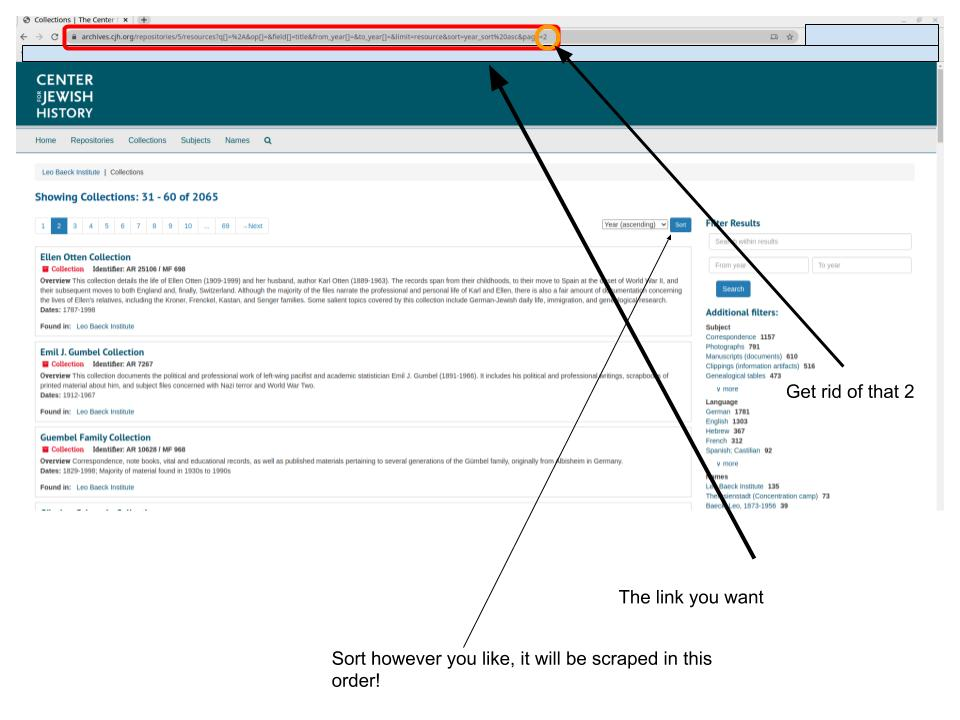

## Running your code!
Hit run and wait! Larger queries can take a while but your results will be downloaded to the temp directory in google colab, or the working directory if you are doing this offline.


In [6]:
custom_url = ''

In [8]:
#records
custom_recs = CJH_Archives('custom',custom_url).get_meta_data('records', 1, 3)
#collections
custom_cols= CJH_Archives('custom',custom_url).get_meta_data('collections', 1, 3)

In [ ]:
custom_recs.to_csv('<YOUR_REPO_HERE>_records_output.csv')
custom_recs.to_excel('<YOUR_REPO_HERE>_output.xlsx')

custom_cols.to_csv('<YOUR_REPO_HERE>_output.csv')
custom_cols.to_excel('<YOUR_REPO_HERE>_output.xlsx')